### Name: Irfan Rahmanindra 
### Assignment 2 - Data Mining

In [31]:
import time
from pathlib import Path
from itertools import combinations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from mlxtend.frequent_patterns import apriori, association_rules

# Load all data
ratings = pd.read_csv('../data/ratings.csv')
movies = pd.read_csv('../data/movies.csv')

### Load Data Movies

In [33]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### Load Data Rating

In [34]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### Check Data

In [35]:
 # Check for duplicate movie IDs
movies.movieId.value_counts(),print('Number of duplicated unique ids are: ',movies.movieId.duplicated().sum())

Number of duplicated unique ids are:  0


(movieId
 1         1
 53322     1
 53129     1
 53138     1
 53140     1
          ..
 4390      1
 4392      1
 4393      1
 4394      1
 193609    1
 Name: count, Length: 9742, dtype: int64,
 None)

### Filter Rating above 4.0

In [36]:
# Filter high ratings
high_rated = ratings[ratings['rating'] >= 4.0]
high_rated

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100830,610,166528,4.0,1493879365
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047


### Combine Table movies and rating
### Generate Dataset with minimum 25 user per movie

In [37]:
MIN_USER_COUNT = 25 
#Create Basket Matrix with Minimum 25 User per Movie
#Merge the ratings with movie titles to have a more informative dataset.
data = high_rated.merge(movies[['movieId', 'title']], on='movieId')

#Identify movies that have been rated by at least MIN_USER_COUNT unique users.
movie_counts = data.groupby('title')['userId'].nunique()
frequent_movies = movie_counts[movie_counts >= MIN_USER_COUNT].index

#Filter the data to include only these frequent movies.
filtered_data = data[data['title'].isin(frequent_movies)]

#Create the basket matrix
basket = filtered_data.groupby(['userId', 'title'])['rating'].count().unstack(fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

print(f"Basket shape (N_users, M_frequent_movies): {basket.shape}")
basket

Basket shape (N_users, M_frequent_movies): (607, 468)


/var/folders/cc/cczc87ns1577rjj9lh9s24mc0000gn/T/ipykernel_65135/3869160544.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


title,(500) Days of Summer (2009),10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",50 First Dates (2004),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),...,Whiplash (2014),Who Framed Roger Rabbit? (1988),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wolf of Wall Street, The (2013)",X-Men (2000),X2: X-Men United (2003),Young Frankenstein (1974),Zombieland (2009),Zoolander (2001)
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,1,0,...,0,1,1,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
608,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


### Prepare Dataset by Size

In [38]:
import pandas as pd

FIXED_N = 500 # Fixed number of users (transactions)

# Different 6 Dataset Unique Column Sizes
column_sizes = [10, 15, 20, 25, 30, 35]

base_basket = basket.head(FIXED_N).reset_index(drop=True)

baskets = {
    M: base_basket.iloc[:, :M]
    for M in column_sizes
}


# Save each basket to a CSV file
for M, df in baskets.items():
    file_name = f'../data/basket_{M}.csv'
    df.to_csv(file_name, index=False)

basket_1 = baskets[10]
basket_2 = baskets[15]
basket_3 = baskets[20]
basket_4 = baskets[25]
basket_5 = baskets[30]
basket_6 = baskets[35]

#print shape of each basket
print(f"Basket 1 shape: {basket_1.shape}")
print(f"Basket 2 shape: {basket_2.shape}")
print(f"Basket 3 shape: {basket_3.shape}")
print(f"Basket 4 shape: {basket_4.shape}")
print(f"Basket 5 shape: {basket_5.shape}")
print(f"Basket 6 shape: {basket_6.shape}")

Basket 1 shape: (500, 10)
Basket 2 shape: (500, 15)
Basket 3 shape: (500, 20)
Basket 4 shape: (500, 25)
Basket 5 shape: (500, 30)
Basket 6 shape: (500, 35)


### Apriori Function & Association Rule by mlxtend

In [ ]:
def apriori_fixed_mlxtend(
    basket_file: str,
    min_support: float = 0.05,
    min_confidence: float = 0.5,
):
  
    basket_path = Path(basket_file)
    if not basket_path.exists():
        print(f"ERROR: File not found at {basket_file}")
        return {}

    print(f"Loading basket from: {basket_file}")
    basket_df = pd.read_csv(basket_file)
    N, M = basket_df.shape
    print(f"✓ Loaded N={N}, M={M}\n")

    # Use bool type for optimal mlxtend performance
    basket_bool_df = basket_df.astype(bool)

    print(f"Running Apriori (min_support={min_support}, min_confidence={min_confidence})...")
    start_time = time.time()
    
    # 1. Frequent Itemsets
    frequent_itemsets = apriori(
        basket_bool_df, 
        min_support=min_support, 
        use_colnames=True
    )
    
    # 2. Association Rules
    rules_df = association_rules(
        frequent_itemsets, 
        metric="confidence", 
        min_threshold=min_confidence
    )
    
    execution_time = time.time() - start_time
    print(f"✓ Found {len(frequent_itemsets)} itemsets. Rules generated: {len(rules_df)} in {execution_time:.4f}s")
    
    if len(rules_df) > 0:
        # --- Rule Formatting ---
        rules_df = rules_df.sort_values('lift', ascending=False)
        
        # Rename and format frozensets to strings
        rules_df = rules_df.rename(columns={
            'antecedents': 'Antecedent', 'consequents': 'Consequent', 
            'support': 'Support', 'confidence': 'Confidence', 'lift': 'Lift'
        })[['Antecedent', 'Consequent', 'Support', 'Confidence', 'Lift']].copy()
        
        rules_df['Antecedent'] = rules_df['Antecedent'].map(lambda x: ', '.join(list(x)))
        rules_df['Consequent'] = rules_df['Consequent'].map(lambda x: ', '.join(list(x)))
        
        rules_df[['Support', 'Confidence', 'Lift']] = rules_df[['Support', 'Confidence', 'Lift']].round(6) 
        
        # Return a dictionary containing the necessary results
        return {
            'rules_table': rules_df,
            'exec_time': execution_time,
            'N': N,
            'M': M
        }
    else:
        print("No rules generated. Skipping.")
        return {}

### For All Dataset (Apriori)

In [ ]:
column_sizes = [10, 15, 20, 25, 30, 35] 

all_benchmark_results = []
results_dfs = [] 

for M in column_sizes:
    basket_file = f'../data/basket_{M}.csv'
    
    # Get the raw results dictionary
    results = apriori_fixed_mlxtend(
        basket_file,
        min_support=0.05, 
        min_confidence=0.5,
    )

    if results:
        results_df = results['rules_table']
        results_dfs.append(results_df)
        
        print("Rules:")
        display(results_df)
        all_benchmark_results.append({
            'M': M,
            'N': results['N'],
            'Time': results['exec_time'],
            'Rules_Count': len(results_df)
        })
    else:
        print(f"Skipping M={M} due to zero rules.")


benchmark_summary_df = pd.DataFrame(all_benchmark_results)
print("\n--- Benchmark Summary Table ---")
display(benchmark_summary_df)

Loading basket from: ../data/basket_10.csv
✓ Loaded N=500, M=10

Running Apriori (min_support=0.05, min_confidence=0.5)...
✓ Found 7 itemsets. Rules generated: 0 in 0.0016s
No rules generated. Skipping.
Skipping M=10 due to zero rules.
Loading basket from: ../data/basket_15.csv
✓ Loaded N=500, M=15

Running Apriori (min_support=0.05, min_confidence=0.5)...
✓ Found 10 itemsets. Rules generated: 0 in 0.0014s
No rules generated. Skipping.
Skipping M=15 due to zero rules.
Loading basket from: ../data/basket_20.csv
✓ Loaded N=500, M=20

Running Apriori (min_support=0.05, min_confidence=0.5)...
✓ Found 18 itemsets. Rules generated: 3 in 0.0022s
Rules:


,Antecedent,Consequent,Support,Confidence,Lift
1,Aliens (1986),Alien (1979),0.098,0.753846,4.283217
2,Alien (1979),Aliens (1986),0.098,0.556818,4.283217
0,2001: A Space Odyssey (1968),Alien (1979),0.072,0.553846,3.146853


Loading basket from: ../data/basket_25.csv
✓ Loaded N=500, M=25

Running Apriori (min_support=0.05, min_confidence=0.5)...
✓ Found 32 itemsets. Rules generated: 13 in 0.0024s
Rules:


,Antecedent,Consequent,Support,Confidence,Lift
11,"Aliens (1986), American Beauty (1999)",Alien (1979),0.058,0.878788,4.993113
12,"Alien (1979), American Beauty (1999)",Aliens (1986),0.058,0.630435,4.849498
4,Aliens (1986),Alien (1979),0.098,0.753846,4.283217
5,Alien (1979),Aliens (1986),0.098,0.556818,4.283217
1,2001: A Space Odyssey (1968),Alien (1979),0.072,0.553846,3.146853
8,Amadeus (1984),American Beauty (1999),0.056,0.651163,2.604651
0,12 Angry Men (1957),American Beauty (1999),0.054,0.600000,2.400000
10,"Aliens (1986), Alien (1979)",American Beauty (1999),0.058,0.591837,2.367347
9,American History X (1998),American Beauty (1999),0.100,0.574713,2.298851
3,Airplane! (1980),American Beauty (1999),0.050,0.568182,2.272727


Loading basket from: ../data/basket_30.csv
✓ Loaded N=500, M=30

Running Apriori (min_support=0.05, min_confidence=0.5)...
✓ Found 37 itemsets. Rules generated: 13 in 0.0025s
Rules:


,Antecedent,Consequent,Support,Confidence,Lift
11,"Aliens (1986), American Beauty (1999)",Alien (1979),0.058,0.878788,4.993113
12,"Alien (1979), American Beauty (1999)",Aliens (1986),0.058,0.630435,4.849498
4,Aliens (1986),Alien (1979),0.098,0.753846,4.283217
5,Alien (1979),Aliens (1986),0.098,0.556818,4.283217
1,2001: A Space Odyssey (1968),Alien (1979),0.072,0.553846,3.146853
8,Amadeus (1984),American Beauty (1999),0.056,0.651163,2.604651
0,12 Angry Men (1957),American Beauty (1999),0.054,0.600000,2.400000
10,"Aliens (1986), Alien (1979)",American Beauty (1999),0.058,0.591837,2.367347
9,American History X (1998),American Beauty (1999),0.100,0.574713,2.298851
3,Airplane! (1980),American Beauty (1999),0.050,0.568182,2.272727


Loading basket from: ../data/basket_35.csv
✓ Loaded N=500, M=35

Running Apriori (min_support=0.05, min_confidence=0.5)...
✓ Found 49 itemsets. Rules generated: 16 in 0.0024s
Rules:


,Antecedent,Consequent,Support,Confidence,Lift
14,"Aliens (1986), American Beauty (1999)",Alien (1979),0.058,0.878788,4.993113
15,"Alien (1979), American Beauty (1999)",Aliens (1986),0.058,0.630435,4.849498
4,Aliens (1986),Alien (1979),0.098,0.753846,4.283217
5,Alien (1979),Aliens (1986),0.098,0.556818,4.283217
12,"American President, The (1995)",Apollo 13 (1995),0.050,0.675676,3.187149
1,2001: A Space Odyssey (1968),Alien (1979),0.072,0.553846,3.146853
8,Amadeus (1984),American Beauty (1999),0.056,0.651163,2.604651
0,12 Angry Men (1957),American Beauty (1999),0.054,0.600000,2.400000
13,"Aliens (1986), Alien (1979)",American Beauty (1999),0.058,0.591837,2.367347
11,As Good as It Gets (1997),American Beauty (1999),0.050,0.581395,2.325581



--- Benchmark Summary Table ---


,M,N,Time,Rules_Count
0,20,500,0.002211,3
1,25,500,0.002435,13
2,30,500,0.002453,13
3,35,500,0.002372,16


### Brute Force

In [ ]:

def brute_force_assoc_rules(
    basket_file: str,
    min_support: float = 0.05,
    min_confidence: float = 0.5,
    max_size: int = 10,  
):
  
    basket_path = Path(basket_file)
    if not basket_path.exists():
        print(f"ERROR: File not found at {basket_file}")
        return {}

    print(f"Loading basket from: {basket_file}")
    basket_df = pd.read_csv(basket_file)
    N, M = basket_df.shape
    print(f"✓ Loaded N={N}, M={M}\n")

    # Convert to numpy boolean for speed
    basket = basket_df.values.astype(bool)
    items = basket_df.columns.tolist()
    
    print(f"Running Brute-Force (min_support={min_support}, min_confidence={min_confidence})...")
    start_time = time.time()
    
    # Find all frequent itemsets
    itemset_supports = {}
    
    # Get frequent single items first
    item_supports = basket.sum(axis=0) / N
    frequent_items = [items[i] for i in range(M) if item_supports[i] >= min_support]
    
    # Store single item supports
    for item in frequent_items:
        itemset_supports[frozenset([item])] = item_supports[items.index(item)]
    
    # Generate larger itemsets (up to max_size)
    for size in range(2, min(len(frequent_items) + 1, max_size + 1)):
        for itemset_tuple in combinations(frequent_items, size):
            # Calculate support
            cols = [items.index(item) for item in itemset_tuple]
            support = basket[:, cols].all(axis=1).sum() / N
            
            if support >= min_support:
                itemset_supports[frozenset(itemset_tuple)] = support
    
    # Generate rules from frequent itemsets
    rules = []
    
    for itemset, sup in itemset_supports.items():
        if len(itemset) < 2:
            continue
        
        # Try all antecedent/consequent splits
        for ant_size in range(1, len(itemset)):
            for ant_tuple in combinations(itemset, ant_size):
                ant = frozenset(ant_tuple)
                cons = itemset - ant
                
                ant_sup = itemset_supports.get(ant)
                cons_sup = itemset_supports.get(cons)
                
                if ant_sup and cons_sup:
                    conf = sup / ant_sup
                    if conf >= min_confidence:
                        rules.append({
                            'Antecedent': ant,
                            'Consequent': cons,
                            'Support': sup,
                            'Confidence': conf,
                            'Lift': conf / cons_sup
                        })

    execution_time = time.time() - start_time
    print(f"✓ Found {len(itemset_supports)} itemsets. Rules generated: {len(rules)} in {execution_time:.4f}s")
    
    if len(rules) > 0:
        # Format output
        rules_df = pd.DataFrame(rules)
        rules_df = rules_df.sort_values('Lift', ascending=False)
        
        rules_df['Antecedent'] = rules_df['Antecedent'].map(lambda x: ', '.join(sorted(list(x))))
        rules_df['Consequent'] = rules_df['Consequent'].map(lambda x: ', '.join(sorted(list(x))))
        
        rules_df[['Support', 'Confidence', 'Lift']] = rules_df[['Support', 'Confidence', 'Lift']].round(6)
        
        return {
            'rules_table': rules_df,
            'exec_time': execution_time,
            'N': N,
            'M': M
        }
    else:
        print("No rules generated. Skipping.")
        return {}


### Bruteforce

In [33]:
column_sizes = [10, 15, 20, 25, 30, 35] 


all_benchmark_results = []
bruteforce_results_dfs = [] 


for M in column_sizes:
    basket_file = f'../data/basket_{M}.csv'
    
    # Get the raw results dictionary
    results = brute_force_assoc_rules(
        basket_file,
        min_support=0.05, 
        min_confidence=0.5,
    )


    if results:
        bruteforce_results_df = results['rules_table']
        bruteforce_results_dfs.append(bruteforce_results_df)
        
        print("Rules:")
        display(bruteforce_results_df)
        all_benchmark_results.append({
            'M': M,
            'N': results['N'],
            'Time': results['exec_time'],
            'Rules_Count': len(bruteforce_results_df)
        })
    else:
        print(f"Skipping M={M} due to zero rules.")


# Example of final summary table:
benchmark_summary_df = pd.DataFrame(all_benchmark_results)
print("\n--- Benchmark Summary Table ---")
display(benchmark_summary_df)


Loading basket from: ../data/basket_10.csv
✓ Loaded N=500, M=10

Running Brute-Force (min_support=0.05, min_confidence=0.5)...
✓ Found 7 itemsets. Rules generated: 0 in 0.0010s
No rules generated. Skipping.
Skipping M=10 due to zero rules.
Loading basket from: ../data/basket_15.csv
✓ Loaded N=500, M=15

Running Brute-Force (min_support=0.05, min_confidence=0.5)...
✓ Found 10 itemsets. Rules generated: 0 in 0.0048s
No rules generated. Skipping.
Skipping M=15 due to zero rules.
Loading basket from: ../data/basket_20.csv
✓ Loaded N=500, M=20

Running Brute-Force (min_support=0.05, min_confidence=0.5)...
✓ Found 18 itemsets. Rules generated: 3 in 0.1006s
Rules:


,Antecedent,Consequent,Support,Confidence,Lift
1,Aliens (1986),Alien (1979),0.098,0.753846,4.283217
2,Alien (1979),Aliens (1986),0.098,0.556818,4.283217
0,2001: A Space Odyssey (1968),Alien (1979),0.072,0.553846,3.146853


Loading basket from: ../data/basket_25.csv
✓ Loaded N=500, M=25

Running Brute-Force (min_support=0.05, min_confidence=0.5)...
✓ Found 32 itemsets. Rules generated: 13 in 0.5925s
Rules:


,Antecedent,Consequent,Support,Confidence,Lift
11,"Aliens (1986), American Beauty (1999)",Alien (1979),0.058,0.878788,4.993113
12,"Alien (1979), American Beauty (1999)",Aliens (1986),0.058,0.630435,4.849498
4,Aliens (1986),Alien (1979),0.098,0.753846,4.283217
5,Alien (1979),Aliens (1986),0.098,0.556818,4.283217
1,2001: A Space Odyssey (1968),Alien (1979),0.072,0.553846,3.146853
8,Amadeus (1984),American Beauty (1999),0.056,0.651163,2.604651
0,12 Angry Men (1957),American Beauty (1999),0.054,0.600000,2.400000
10,"Alien (1979), Aliens (1986)",American Beauty (1999),0.058,0.591837,2.367347
9,American History X (1998),American Beauty (1999),0.100,0.574713,2.298851
3,Airplane! (1980),American Beauty (1999),0.050,0.568182,2.272727


Loading basket from: ../data/basket_30.csv
✓ Loaded N=500, M=30

Running Brute-Force (min_support=0.05, min_confidence=0.5)...
✓ Found 37 itemsets. Rules generated: 13 in 9.1127s
Rules:


,Antecedent,Consequent,Support,Confidence,Lift
11,"Aliens (1986), American Beauty (1999)",Alien (1979),0.058,0.878788,4.993113
12,"Alien (1979), American Beauty (1999)",Aliens (1986),0.058,0.630435,4.849498
4,Aliens (1986),Alien (1979),0.098,0.753846,4.283217
5,Alien (1979),Aliens (1986),0.098,0.556818,4.283217
1,2001: A Space Odyssey (1968),Alien (1979),0.072,0.553846,3.146853
8,Amadeus (1984),American Beauty (1999),0.056,0.651163,2.604651
0,12 Angry Men (1957),American Beauty (1999),0.054,0.600000,2.400000
10,"Alien (1979), Aliens (1986)",American Beauty (1999),0.058,0.591837,2.367347
9,American History X (1998),American Beauty (1999),0.100,0.574713,2.298851
3,Airplane! (1980),American Beauty (1999),0.050,0.568182,2.272727


Loading basket from: ../data/basket_35.csv
✓ Loaded N=500, M=35

Running Brute-Force (min_support=0.05, min_confidence=0.5)...
✓ Found 49 itemsets. Rules generated: 16 in 55.8225s
Rules:


,Antecedent,Consequent,Support,Confidence,Lift
14,"Aliens (1986), American Beauty (1999)",Alien (1979),0.058,0.878788,4.993113
15,"Alien (1979), American Beauty (1999)",Aliens (1986),0.058,0.630435,4.849498
4,Aliens (1986),Alien (1979),0.098,0.753846,4.283217
5,Alien (1979),Aliens (1986),0.098,0.556818,4.283217
12,"American President, The (1995)",Apollo 13 (1995),0.050,0.675676,3.187149
1,2001: A Space Odyssey (1968),Alien (1979),0.072,0.553846,3.146853
8,Amadeus (1984),American Beauty (1999),0.056,0.651163,2.604651
0,12 Angry Men (1957),American Beauty (1999),0.054,0.600000,2.400000
13,"Alien (1979), Aliens (1986)",American Beauty (1999),0.058,0.591837,2.367347
11,As Good as It Gets (1997),American Beauty (1999),0.050,0.581395,2.325581



--- Benchmark Summary Table ---


,M,N,Time,Rules_Count
0,20,500,0.100627,3
1,25,500,0.592476,13
2,30,500,9.112733,13
3,35,500,55.822515,16


### Comparison

PROCESSING M=10

--- APRIORI ---
✓ Itemsets: 7 in 0.0008s
✓ Rules: 0 in 0.0005s
✓ Total: 0.0013s

--- BRUTE-FORCE ---
✓ Itemsets: 7 in 0.0004s
✓ Rules: 0 in 0.0000s
✓ Total: 0.0004s


PROCESSING M=15

--- APRIORI ---
✓ Itemsets: 10 in 0.0006s
✓ Rules: 0 in 0.0003s
✓ Total: 0.0009s

--- BRUTE-FORCE ---
✓ Itemsets: 10 in 0.0030s
✓ Rules: 0 in 0.0000s
✓ Total: 0.0030s


PROCESSING M=20

--- APRIORI ---
✓ Itemsets: 18 in 0.0008s
✓ Rules: 3 in 0.0008s
✓ Total: 0.0016s

--- BRUTE-FORCE ---
✓ Itemsets: 18 in 0.0762s
✓ Rules: 3 in 0.0000s
✓ Total: 0.0762s


PROCESSING M=25

--- APRIORI ---
✓ Itemsets: 32 in 0.0009s
✓ Rules: 13 in 0.0006s
✓ Total: 0.0015s

--- BRUTE-FORCE ---
✓ Itemsets: 32 in 0.4626s
✓ Rules: 13 in 0.0000s
✓ Total: 0.4626s


PROCESSING M=30

--- APRIORI ---
✓ Itemsets: 37 in 0.0008s
✓ Rules: 13 in 0.0007s
✓ Total: 0.0016s

--- BRUTE-FORCE ---
✓ Itemsets: 37 in 6.6501s
✓ Rules: 13 in 0.0000s
✓ Total: 6.6501s


PROCESSING M=35

--- APRIORI ---
✓ Itemsets: 49 in 0.0010s
✓ Rules: 

,M,Method,Itemsets_Time,Rules_Time,Total_Time,Itemsets_Count,Rules_Count
0,10,Apriori,0.0008,0.0005,0.0013,7,0
1,10,Brute-Force,0.0004,0.0000,0.0004,7,0
2,15,Apriori,0.0006,0.0003,0.0009,10,0
3,15,Brute-Force,0.0030,0.0000,0.0030,10,0
4,20,Apriori,0.0008,0.0008,0.0016,18,3
5,20,Brute-Force,0.0762,0.0000,0.0762,18,3
6,25,Apriori,0.0009,0.0006,0.0015,32,13
7,25,Brute-Force,0.4626,0.0000,0.4626,32,13
8,30,Apriori,0.0008,0.0007,0.0016,37,13
9,30,Brute-Force,6.6501,0.0000,6.6501,37,13



SPEEDUP ANALYSIS


,M,Apriori_Itemsets (s),Apriori_Rules (s),Apriori_Total (s),BF_Itemsets (s),BF_Rules (s),BF_Total (s),Speedup_Total (x),Speedup_Itemsets (x)
0,10,0.0008,0.0005,0.0013,0.0004,0.0,0.0004,0.33,0.52
1,15,0.0006,0.0003,0.0009,0.0030,0.0,0.0030,3.24,5.06
2,20,0.0008,0.0008,0.0016,0.0762,0.0,0.0762,46.82,95.97
3,25,0.0009,0.0006,0.0015,0.4626,0.0,0.4626,305.14,532.15
4,30,0.0008,0.0007,0.0016,6.6501,0.0,6.6501,4209.56,7843.75
5,35,0.0010,0.0007,0.0017,39.8512,0.0,39.8513,23665.35,39218.24


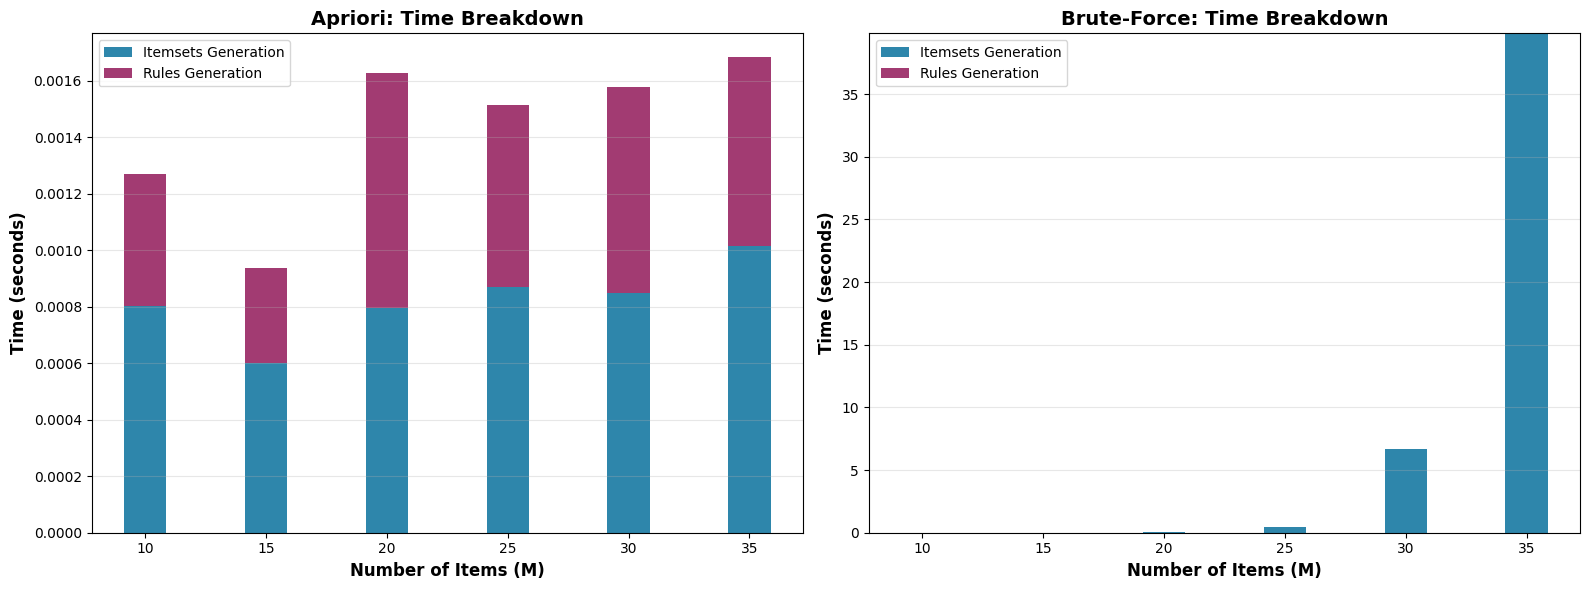

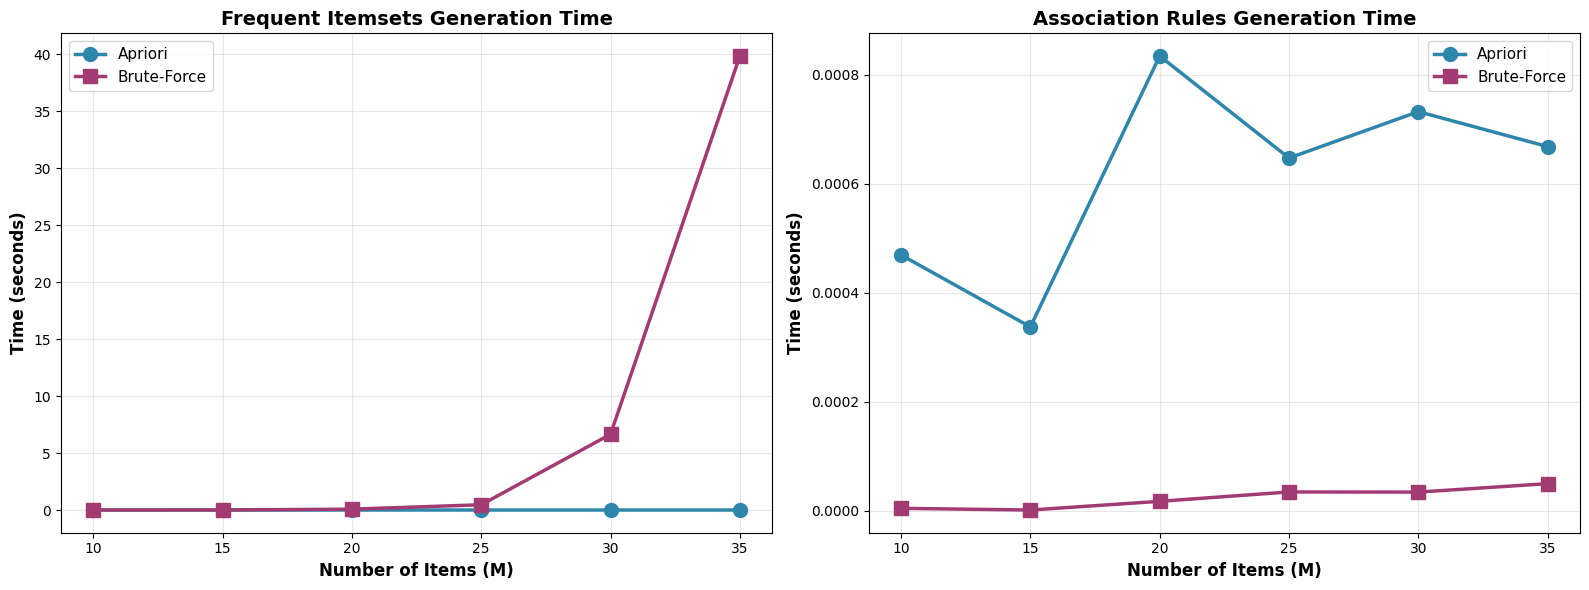

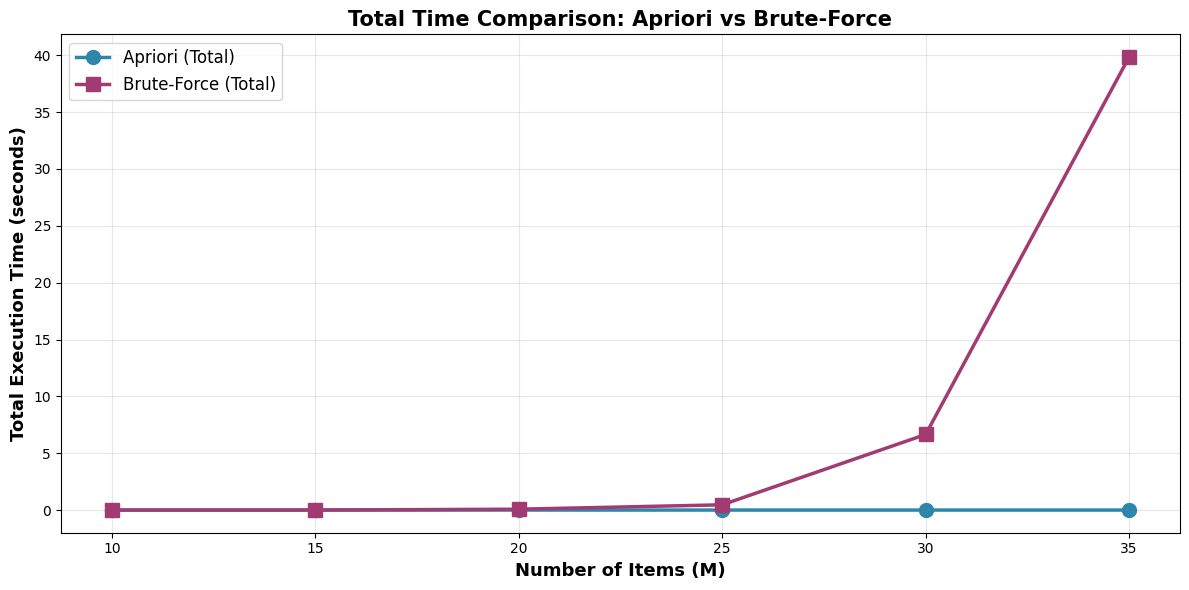

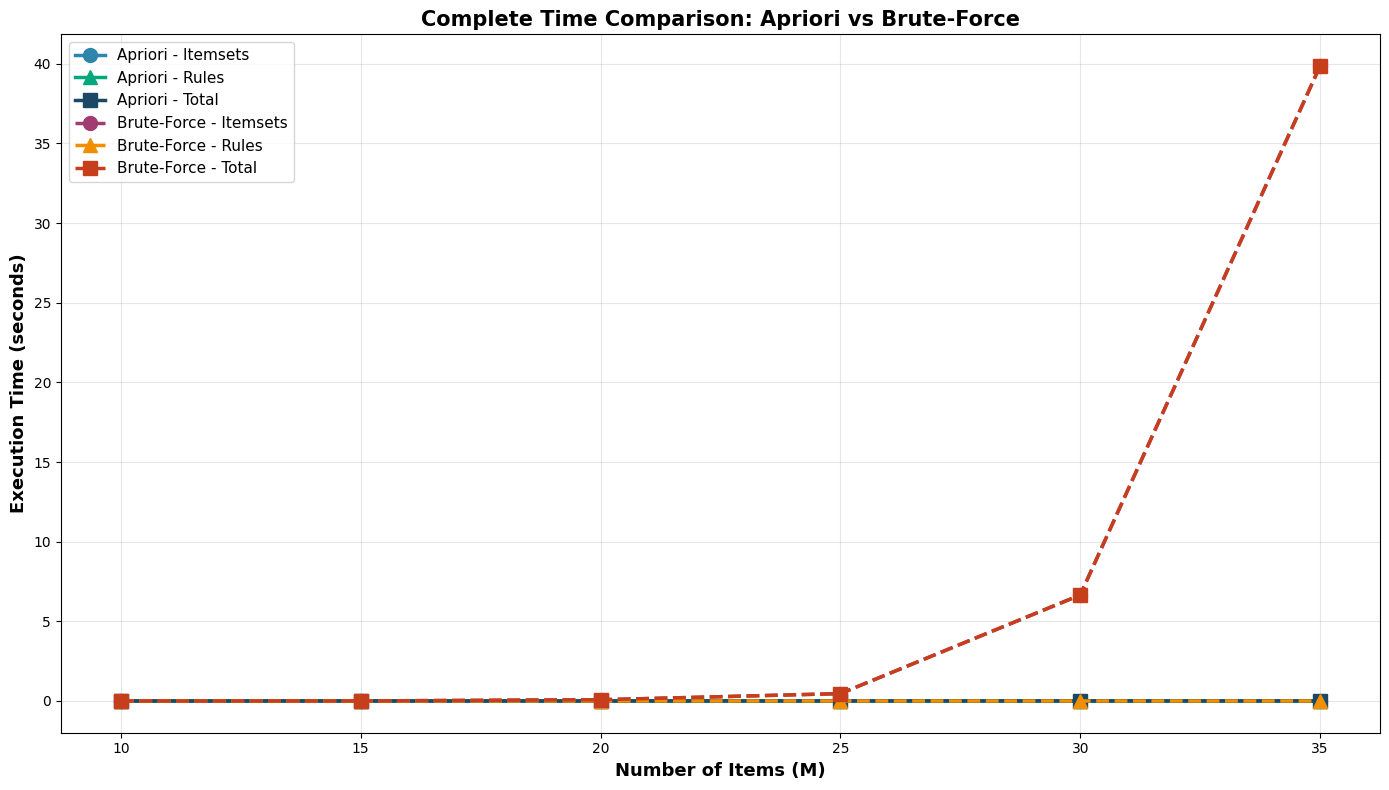

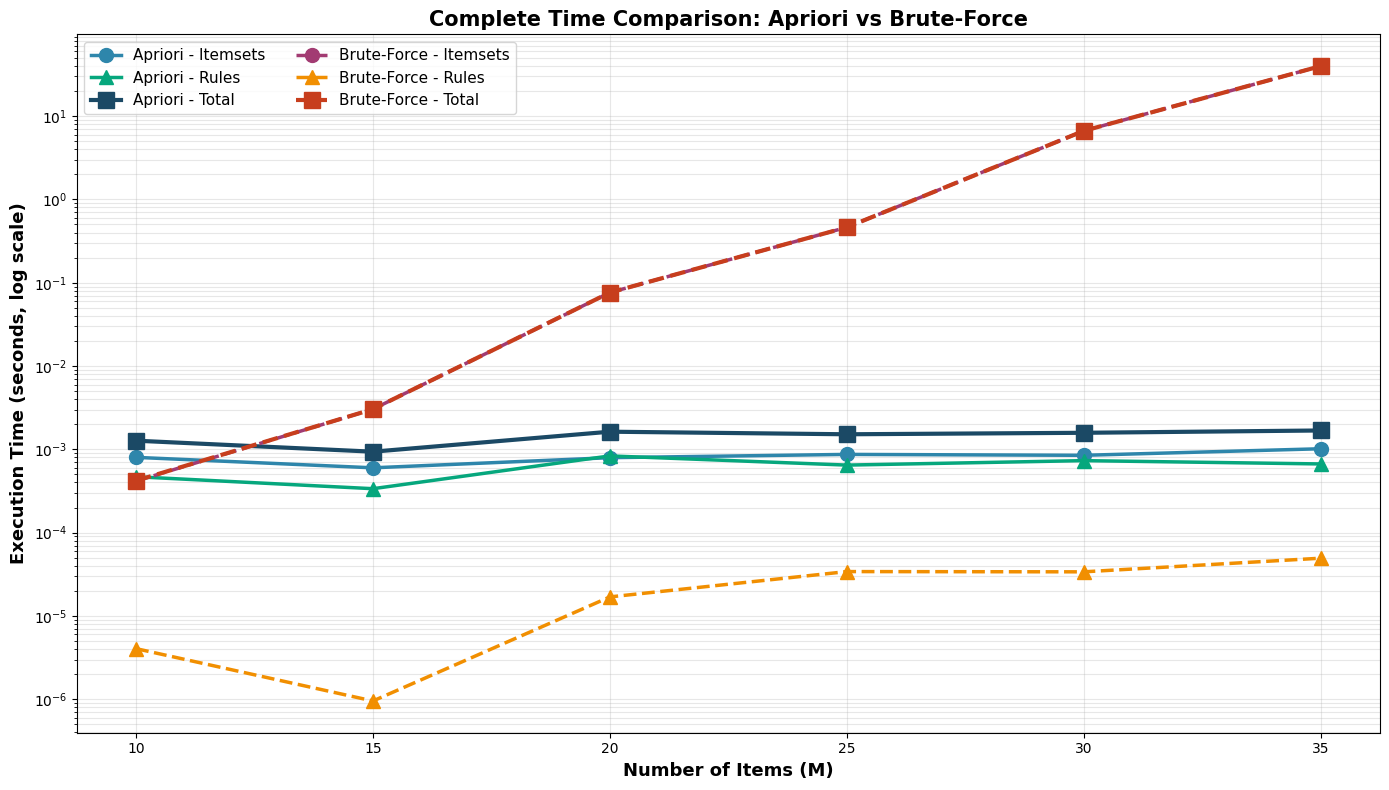

In [ ]:
# RUN BOTH METHODS WITH SEPARATE TIMING
column_sizes = [10, 15, 20, 25, 30, 35] 
min_support = 0.05
min_confidence = 0.5

apriori_results = []
bruteforce_results = []

for M in column_sizes:
    basket_file = f'../data/basket_{M}.csv'
    
    print("="*80)
    print(f"PROCESSING M={M}")
    print("="*80)
    
 # ========== APRIORI ==========
    print("\n--- APRIORI ---")
    dataset = pd.read_csv(basket_file)
    N, M_cols = dataset.shape
    basket_bool = dataset.astype(bool)
    
    # Time: Frequent Itemsets
    start_itemsets = time.time()
    frequent_itemsets = apriori(basket_bool, min_support=min_support, use_colnames=True)
    itemsets_time = time.time() - start_itemsets
    
    # Time: Association Rules
    start_rules = time.time()
    rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    rules_time = time.time() - start_rules
    
    total_apriori_time = itemsets_time + rules_time
    
    print(f"✓ Itemsets: {len(frequent_itemsets)} in {itemsets_time:.4f}s")
    print(f"✓ Rules: {len(rules_df)} in {rules_time:.4f}s")
    print(f"✓ Total: {total_apriori_time:.4f}s")
    
    apriori_results.append({
        'M': M_cols,
        'N': N,
        'Itemsets_Time': itemsets_time,
        'Rules_Time': rules_time,
        'Total_Time': total_apriori_time,
        'Itemsets_Count': len(frequent_itemsets),
        'Rules_Count': len(rules_df)
    })
    
# ========== BRUTE-FORCE ==========
    print("\n--- BRUTE-FORCE ---")
    transactions = dataset.values.astype(bool)
    
    # Time: Frequent Itemsets
    start_itemsets_bf = time.time()
    itemset_supports = brute_force_frequent_itemsets(
        transactions, 
        min_support=min_support,
        max_size=10
    )
    itemsets_time_bf = time.time() - start_itemsets_bf
    
    # Time: Association Rules
    start_rules_bf = time.time()
    rules_bf = brute_force_association_rules(itemset_supports, min_confidence=min_confidence)
    rules_time_bf = time.time() - start_rules_bf
    
    total_bf_time = itemsets_time_bf + rules_time_bf
    
    print(f"✓ Itemsets: {len(itemset_supports)} in {itemsets_time_bf:.4f}s")
    print(f"✓ Rules: {len(rules_bf)} in {rules_time_bf:.4f}s")
    print(f"✓ Total: {total_bf_time:.4f}s")
    
    bruteforce_results.append({
        'M': M_cols,
        'N': N,
        'Itemsets_Time': itemsets_time_bf,
        'Rules_Time': rules_time_bf,
        'Total_Time': total_bf_time,
        'Itemsets_Count': len(itemset_supports),
        'Rules_Count': len(rules_bf)
    })
    
    print("\n")



# DETAILED COMPARISON TABLE

comparison_detailed = []

for ap, bf in zip(apriori_results, bruteforce_results):
    comparison_detailed.append({
        'M': ap['M'],
        'Method': 'Apriori',
        'Itemsets_Time': round(ap['Itemsets_Time'], 4),
        'Rules_Time': round(ap['Rules_Time'], 4),
        'Total_Time': round(ap['Total_Time'], 4),
        'Itemsets_Count': ap['Itemsets_Count'],
        'Rules_Count': ap['Rules_Count']
    })
    comparison_detailed.append({
        'M': bf['M'],
        'Method': 'Brute-Force',
        'Itemsets_Time': round(bf['Itemsets_Time'], 4),
        'Rules_Time': round(bf['Rules_Time'], 4),
        'Total_Time': round(bf['Total_Time'], 4),
        'Itemsets_Count': bf['Itemsets_Count'],
        'Rules_Count': bf['Rules_Count']
    })

detailed_df = pd.DataFrame(comparison_detailed)

print("\n" + "="*80)
print("DETAILED TIME BREAKDOWN")
print("="*80)
display(detailed_df)



# SPEEDUP ANALYSIS TABLE

speedup_data = []

for ap, bf in zip(apriori_results, bruteforce_results):
    speedup_data.append({
        'M': ap['M'],
        'Apriori_Itemsets (s)': round(ap['Itemsets_Time'], 4),
        'Apriori_Rules (s)': round(ap['Rules_Time'], 4),
        'Apriori_Total (s)': round(ap['Total_Time'], 4),
        'BF_Itemsets (s)': round(bf['Itemsets_Time'], 4),
        'BF_Rules (s)': round(bf['Rules_Time'], 4),
        'BF_Total (s)': round(bf['Total_Time'], 4),
        'Speedup_Total (x)': round(bf['Total_Time'] / ap['Total_Time'], 2),
        'Speedup_Itemsets (x)': round(bf['Itemsets_Time'] / ap['Itemsets_Time'], 2),
    })

speedup_df = pd.DataFrame(speedup_data)

print("\n" + "="*80)
print("SPEEDUP ANALYSIS")
print("="*80)
display(speedup_df)



# STACKED BAR - TIME BREAKDOWN

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

M_values = [r['M'] for r in apriori_results]
x = np.arange(len(M_values))
width = 0.35

# Apriori breakdown
ap_itemsets = [r['Itemsets_Time'] for r in apriori_results]
ap_rules = [r['Rules_Time'] for r in apriori_results]

# Brute-force breakdown
bf_itemsets = [r['Itemsets_Time'] for r in bruteforce_results]
bf_rules = [r['Rules_Time'] for r in bruteforce_results]

# Plot 1: Apriori
ax1 = axes[0]
ax1.bar(x, ap_itemsets, width, label='Itemsets Generation', color='#2E86AB')
ax1.bar(x, ap_rules, width, bottom=ap_itemsets, label='Rules Generation', color='#A23B72')
ax1.set_xlabel('Number of Items (M)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Time (seconds)', fontsize=12, fontweight='bold')
ax1.set_title('Apriori: Time Breakdown', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(M_values)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Brute-Force
ax2 = axes[1]
ax2.bar(x, bf_itemsets, width, label='Itemsets Generation', color='#2E86AB')
ax2.bar(x, bf_rules, width, bottom=bf_itemsets, label='Rules Generation', color='#A23B72')
ax2.set_xlabel('Number of Items (M)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Time (seconds)', fontsize=12, fontweight='bold')
ax2.set_title('Brute-Force: Time Breakdown', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(M_values)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()



# SIDE-BY-SIDE COMPARISON (ITEMSETS vs RULES)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Itemsets Time
ax1 = axes[0]
ax1.plot(M_values, ap_itemsets, 'o-', linewidth=2.5, markersize=10, 
         label='Apriori', color='#2E86AB')
ax1.plot(M_values, bf_itemsets, 's-', linewidth=2.5, markersize=10, 
         label='Brute-Force', color='#A23B72')
ax1.set_xlabel('Number of Items (M)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Time (seconds)', fontsize=12, fontweight='bold')
ax1.set_title('Frequent Itemsets Generation Time', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Rules Time
ax2 = axes[1]
ax2.plot(M_values, ap_rules, 'o-', linewidth=2.5, markersize=10, 
         label='Apriori', color='#2E86AB')
ax2.plot(M_values, bf_rules, 's-', linewidth=2.5, markersize=10, 
         label='Brute-Force', color='#A23B72')
ax2.set_xlabel('Number of Items (M)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Time (seconds)', fontsize=12, fontweight='bold')
ax2.set_title('Association Rules Generation Time', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



#  TOTAL TIME COMPARISON

fig, ax = plt.subplots(figsize=(12, 6))

ap_total = [r['Total_Time'] for r in apriori_results]
bf_total = [r['Total_Time'] for r in bruteforce_results]

ax.plot(M_values, ap_total, 'o-', linewidth=2.5, markersize=10, 
        label='Apriori (Total)', color='#2E86AB')
ax.plot(M_values, bf_total, 's-', linewidth=2.5, markersize=10, 
        label='Brute-Force (Total)', color='#A23B72')
ax.set_xlabel('Number of Items (M)', fontsize=13, fontweight='bold')
ax.set_ylabel('Total Execution Time (seconds)', fontsize=13, fontweight='bold')
ax.set_title('Total Time Comparison: Apriori vs Brute-Force', fontsize=15, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# COMBINED TIME COMPARISON - ALL IN ONE PLOT

fig, ax = plt.subplots(figsize=(14, 8))

# Apriori times
ax.plot(M_values, ap_itemsets, 'o-', linewidth=2.5, markersize=10, 
        label='Apriori - Itemsets', color='#2E86AB')
ax.plot(M_values, ap_rules, '^-', linewidth=2.5, markersize=10, 
        label='Apriori - Rules', color='#06A77D')
ax.plot(M_values, ap_total, 's-', linewidth=2.5, markersize=10, 
        label='Apriori - Total', color='#1B4965')

# Brute-Force times
ax.plot(M_values, bf_itemsets, 'o--', linewidth=2.5, markersize=10, 
        label='Brute-Force - Itemsets', color='#A23B72')
ax.plot(M_values, bf_rules, '^--', linewidth=2.5, markersize=10, 
        label='Brute-Force - Rules', color='#F18F01')
ax.plot(M_values, bf_total, 's--', linewidth=2.5, markersize=10, 
        label='Brute-Force - Total', color='#C73E1D')

ax.set_xlabel('Number of Items (M)', fontsize=13, fontweight='bold')
ax.set_ylabel('Execution Time (seconds)', fontsize=13, fontweight='bold')
ax.set_title('Complete Time Comparison: Apriori vs Brute-Force', fontsize=15, fontweight='bold')
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# COMBINED TIME COMPARISON - WITH LOG SCALE

fig, ax = plt.subplots(figsize=(14, 8))

# Apriori times (solid lines)
ax.plot(M_values, ap_itemsets, 'o-', linewidth=2.5, markersize=10, 
        label='Apriori - Itemsets', color='#2E86AB')
ax.plot(M_values, ap_rules, '^-', linewidth=2.5, markersize=10, 
        label='Apriori - Rules', color='#06A77D')
ax.plot(M_values, ap_total, 's-', linewidth=3, markersize=12, 
        label='Apriori - Total', color='#1B4965')

# Brute-Force times (dashed lines)
ax.plot(M_values, bf_itemsets, 'o--', linewidth=2.5, markersize=10, 
        label='Brute-Force - Itemsets', color='#A23B72')
ax.plot(M_values, bf_rules, '^--', linewidth=2.5, markersize=10, 
        label='Brute-Force - Rules', color='#F18F01')
ax.plot(M_values, bf_total, 's--', linewidth=3, markersize=12, 
        label='Brute-Force - Total', color='#C73E1D')

ax.set_xlabel('Number of Items (M)', fontsize=13, fontweight='bold')
ax.set_ylabel('Execution Time (seconds, log scale)', fontsize=13, fontweight='bold')
ax.set_title('Complete Time Comparison: Apriori vs Brute-Force', fontsize=15, fontweight='bold')
ax.set_yscale('log')  
ax.legend(fontsize=11, loc='upper left', ncol=2)
ax.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

### Total Time with Estimator for Larger Dataset (Estimator)

In [29]:
# Measured brute-force timing data
M_small = np.array([10, 15, 20, 25, 30, 35])
bf_total = np.array([0.0004, 0.0030, 0.0762, 0.4626, 6.6501, 39.8513])
N = 500  # constant number of transactions

# One reference data point to solve for C
M_reference = 10  
time_reference = 0.0004  

# Solve for C using theoretical formula: Time = C * 2^M
C = time_reference / (2 ** M_reference)

# Extrapolate for larger M using theoretical formula
large_M = np.array([40, 50, 60])
bf_est_large = C * (2 ** large_M)

# Build DataFrame for big M values
df_large = pd.DataFrame({
    "M": large_M,
    "BF_Total (Estimated, s)": bf_est_large
})

print(f"Theoretical Complexity: O(2^M)")
print(f"Reference point: M={M_reference}, Time={time_reference}s")
print(f"Fitted coefficient C: {C:.2e}")
print(f"\nExtrapolated times for larger M:")
display(df_large)



Theoretical Complexity: O(2^M)
Reference point: M=10, Time=0.0004s
Fitted coefficient C: 3.91e-07

Extrapolated times for larger M:


,M,"BF_Total (Estimated, s)"
0,40,4.294967e+05
1,50,4.398047e+08
2,60,4.503600e+11
